# MLT-Lab-CSE6024_Lab-Assessment-2: Implementation and Performance Analysis through Comparison on the efficiency of Clustering for two Clustering techniques : A) K-Means Clustering  and  B) Agglomerative Clustering , on a Beverage Dataset - 'Bev_nm.csv'

Submitted By: 20MAI0001 - NIHARIKA MAITRA

Git Repo link :

In [313]:
#1) To Import the Beverage dataset Bev_nm.csv and 
#to Read the dataset onto a variable (DataFrame) using Pandas :

import pandas as pd
beverages_df = pd.read_csv("Bev_nm.csv") #Bev_nm.csv


In [314]:
#To display the first 5 Records of the Input Beverage dataset - Bev_nm.csv :

beverages_df.head()

,Name,Potassium,Sodium,Caffeine,Cost
0,new_england_coffee,144,15,4.7,0.43
1,post_alley_blend,151,19,4.9,0.43
2,stumpdown_coffee,157,15,0.9,0.48
3,bizzy_organic_coffee,170,7,5.2,0.73
4,indian_bean,152,11,5.0,0.77


In [315]:
#2 To Import the necessary python libraries and Packages  :

import numpy as np
import seaborn as sns
#import matplotlib as mlt
import matplotlib.pyplot as plt
#%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Implementing some Feature Engineering on the Input Beverage dataset - Bev_nm.csv :

To visualize a few plots for better understanding of the type of relationship that exits between the different attributes / features of the input Beverage dataset - Bev_nm.csv : 

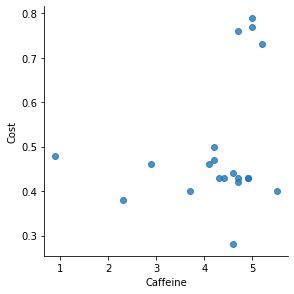

In [316]:
#To plot a Scatter Plot between the 'Caffeine' and 'Cost'  
#attributes / features of the Beverage dataset - Bev_nm.csv :

sns.lmplot("Caffeine","Cost",data =beverages_df, fit_reg = False, size =4)

                       Cost
Name                       
jacobs_coffee          0.28
caribou_coffee         0.38
grounds_hounds_coffee  0.40
mount_hagen            0.40
la_columbe_corisca     0.42
cremoso_coffee         0.43
post_alley_blend       0.43
irish_hazelnut_coffee  0.43
new_england_coffee     0.43
lavazza_super_crema    0.43
red_bay_coffee         0.44
davidoff_coffee        0.46
peerless_wholebean     0.46
js_coffee              0.47
stumpdown_coffee       0.48
stone_street_coffee    0.50
bizzy_organic_coffee   0.73
green_mountain_coffee  0.76
indian_bean            0.77
koffee_cuit            0.79


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

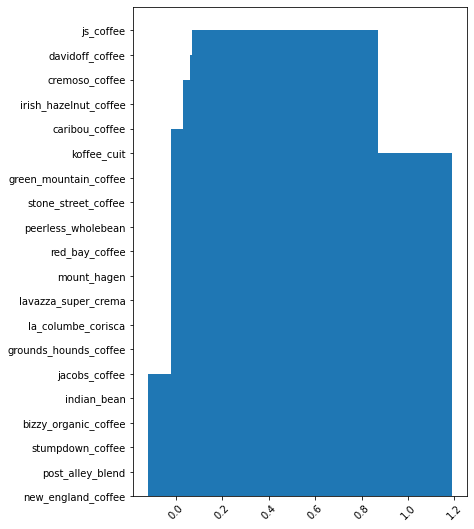

In [317]:
#Plotting  Bar graph betweeen 'Cost' and 'Name'
#attributes / features of the Beverage dataset - Bev_nm.csv :

groupedby_places = beverages_df.groupby("Name")[["Cost"]].mean()
print(groupedby_places.sort_values(by = ["Cost"]))
plt.figure(figsize=(6,9))

plt.bar(x=beverages_df["Cost"],height=beverages_df["Name"])
plt.xticks(rotation=45)

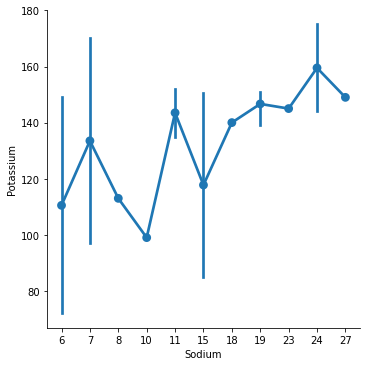

In [318]:
#Plotting Factor Plot betweeen 'Sodium' and  and 'Potassium'
#attributes / features of the Beverage dataset - Bev_nm.csv :

sns.factorplot(x = "Sodium", y = "Potassium", data = beverages_df)

In [319]:
# Describing each row of the Beverage dataset - Bev_nm.csv including all Attributes / 
#Feature Variables in terms of different Statistical measures/parameters:

beverages_df.describe()

,Potassium,Sodium,Caffeine,Cost
count,20.000000,20.000000,20.000000,20.000000
mean,132.550000,14.950000,4.240000,0.494500
std,30.283702,6.581273,1.087924,0.144858
min,68.000000,6.000000,0.900000,0.280000
25%,110.250000,9.500000,4.175000,0.427500
50%,144.000000,15.000000,4.600000,0.435000
75%,150.250000,19.000000,4.900000,0.485000
max,175.000000,27.000000,5.500000,0.790000


In [320]:
#To view detailed information of the different Data Types
#of the variables present in the Beverage dataset - Bev_nm.csv :

beverages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       20 non-null     object 
 1   Potassium  20 non-null     int64  
 2   Sodium     20 non-null     int64  
 3   Caffeine   20 non-null     float64
 4   Cost       20 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 928.0+ bytes


In [321]:
# To check and give the count of missing values present for 
#each of the Input Features 
#('Name', 'Potassium', 'Sodium', 'Caffeine', 'Cost') of the
#dataset - Bev-nm.csv 

beverages_df.isna().sum()

Name         0
Potassium    0
Sodium       0
Caffeine     0
Cost         0
dtype: int64

In [322]:
#To display the unique values of the attribute 'Name' of the
#Bev_nm.cv dataset :

beverages_df["Name"].unique()

array(['new_england_coffee', 'post_alley_blend', 'stumpdown_coffee',
       'bizzy_organic_coffee', 'indian_bean', 'jacobs_coffee',
       'grounds_hounds_coffee', 'la_columbe_corisca',
       'lavazza_super_crema', 'mount_hagen', 'red_bay_coffee',
       'peerless_wholebean', 'stone_street_coffee',
       'green_mountain_coffee', 'koffee_cuit', 'caribou_coffee',
       'irish_hazelnut_coffee', 'cremoso_coffee', 'davidoff_coffee',
       'js_coffee'], dtype=object)

In [323]:
#To display the number of occurrence of each unique value of
#the attribute 'Caffeine' of the Bev_nm.cv dataset :

beverages_df["Caffeine"].value_counts()

4.7    3
4.9    2
4.6    2
4.2    2
5.0    2
2.3    1
4.1    1
0.9    1
3.7    1
2.9    1
4.4    1
4.3    1
5.2    1
5.5    1
Name: Caffeine, dtype: int64

In [324]:
# Converting the data type of "Name" from string to float using LabelEncoder() :
'''from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for Name in beverages_df.columns:
        if beverages_df["Name"].dtype == object:
            beverages_df["Name_fl"] = le.fit_transform(beverages_df["Name"])
        else:
            pass'''

'from sklearn import preprocessing\n\nle = preprocessing.LabelEncoder()\n\nfor Name in beverages_df.columns:\n        if beverages_df["Name"].dtype == object:\n            beverages_df["Name_fl"] = le.fit_transform(beverages_df["Name"])\n        else:\n            pass'

In [325]:
#beverages_df

In [326]:
beverages_df1 = beverages_df[["Potassium", "Sodium", "Caffeine", "Cost"]]

In [327]:
beverages_df1.tail()

,Potassium,Sodium,Caffeine,Cost
15,68,15,2.3,0.38
16,139,19,4.4,0.43
17,144,24,4.9,0.43
18,72,6,2.9,0.46
19,97,7,4.2,0.47


# Implementation of the K-Means Clustering Technique for performing Clustering on the Beverage dataset - Bev_nm.csv : 

In [328]:
#3) Importing K-Means Clustering Model:

from sklearn.cluster import KMeans

#No. of Clusters in the K-Means Clustering is initialized to
#start with 3 clusters

km_clusters = KMeans(3) 

Fitting our Input Beverage dataset - Bev_nm.csv into 
the K-Means Clustering Model for implentation of Clustering
process using K-Means Algorithm on the input dataset:


In [329]:
km_clusters.fit(beverages_df1)

KMeans(n_clusters=3)

In [330]:
#4) The Output variable that contains all the Cluster - ID s for 
#each of the data items in the input Beverage dataset - 'Bev_nm.csv' is 
#km_clusters.labels_

beverages_df["Cluster_ID"] = km_clusters.labels_

To view the data items of the input Beverage dataset - Bev_nm.csv , with their corresponding Labels / Cluster ID s  :

In [331]:
beverages_df[5:10]

,Name,Potassium,Sodium,Caffeine,Cost,Cluster_ID
5,jacobs_coffee,145,23,4.6,0.28,1
6,grounds_hounds_coffee,175,24,5.5,0.40,1
7,la_columbe_corisca,149,27,4.7,0.42,1
8,lavazza_super_crema,99,10,4.3,0.43,0
9,mount_hagen,113,8,3.7,0.40,0


# 5) To visualize the Clusters identified / determined by implementation of the K-Means clustering Technique on the 
input Beverage dataset- Bev_nm.csv 

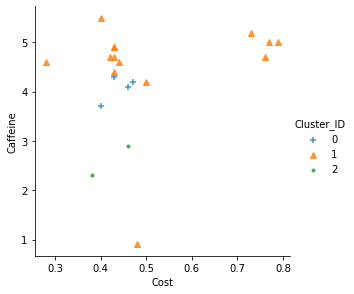

In [332]:
#5) Plotting the Clusters before Normalization (Scale Down) :

markers = ['+','^','.']
sns.lmplot("Cost","Caffeine", data = beverages_df, hue = "Cluster_ID", markers = markers, fit_reg = False, size =4)

6) To implement Normalization on the input Beverage dataset- Bev_nm.csv using Scaler transformation inorder to prevent 

the domination of the particular attribute/feature
'Potassium' which has a higher range / domain of values ,  

as compared to the other attribute/feature of the input dataset 
to dominate the Clutering Process : 

In [333]:
#6) Scaling down all the Features of the input Beverage dataset- Bev_nm.csv:
 
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()

scaled_beverages_df1 = scaler1.fit_transform(beverages_df1[["Potassium", "Sodium", "Caffeine", "Cost"]])

In [334]:
#To view the input Beverage dataset- Bev_nm.csv after 
#Scaling down the values of all the numerical valued 
#Features("Potassium", "Sodium", "Caffeine", "Cost") of the dataset:

scaled_beverages_df1[5:10]    

array([[ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861]])

In [335]:
#7) To Implement K-Means Clustering Technique again to 
#perform Clustering on the Normalized version of the input 
#Beverage dataset- Bev_nm.csv after Scaling down the values
#of all the numerical valued Features of the dataset:

km_clusters_scaled = KMeans(3)

km_clusters_scaled.fit(scaled_beverages_df1)

KMeans(n_clusters=3)

To view the Original data of the input Beverage dataset with the New Assigned Cluster ID s after implementing K-Means Clustering on the Normalized version of the input dataset
i.e, the Scaled down values of all the numerical valued Features of the input dataset version of the - Bev_nm.csv:


In [336]:
#The Output variable that contains the Cluster - ID s for 
#each of the data items in the Normalized version 
#(Scaled down values of all the numerical valued Features) of the input dataset is 
#km_clusters_scaled.labels_

beverages_df["Cluster_ID_New"] = km_clusters_scaled.labels_

In [337]:
scaled_beverages_df1

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

To visualize the Clusters identified / determined by 
implementation of the K-Means clustering Technique on the Normalized version of the input 
Beverage dataset- Bev_nm.csv after Scaling down the values
of all the numerical valued Features of the input Beverage dataset - Bev_nm.csv :

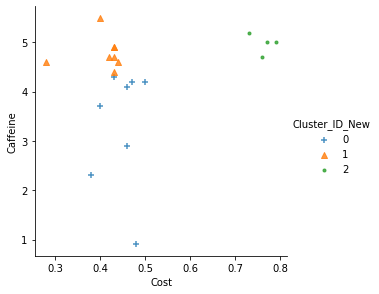

In [338]:
#8) Plotting the Clusters after Normalization (Scale Down) :

markers = ['+','^','.']
sns.lmplot("Cost","Caffeine", data = beverages_df, hue = "Cluster_ID_New", markers = markers, fit_reg = False, size =4)

9) To view Clusterwise data of the Beverage dataset- Bev_nm.csv sfter implementing 
K-Means Clustering on the Scaled down values
of all the Features of the dataset: 

In [339]:
#To view Clusterwise data for Cluster ID : 0
beverages_df[beverages_df.Cluster_ID_New == 0]

,Name,Potassium,Sodium,Caffeine,Cost,Cluster_ID,Cluster_ID_New
2,stumpdown_coffee,157,15,0.9,0.48,1,0
8,lavazza_super_crema,99,10,4.3,0.43,0,0
9,mount_hagen,113,8,3.7,0.40,0,0
11,peerless_wholebean,102,15,4.1,0.46,0,0
12,stone_street_coffee,135,11,4.2,0.50,1,0
15,caribou_coffee,68,15,2.3,0.38,2,0
18,davidoff_coffee,72,6,2.9,0.46,2,0
19,js_coffee,97,7,4.2,0.47,0,0


It can be observed from the preceeding output that in the Coffee brands belonging to 
Cluter ID : 0 , the Caffeine and Cost seems to be in the medium level range of values compared to the given range of other Clusters  

In [340]:
#To view Clusterwise data for Cluster ID : 1
beverages_df[beverages_df.Cluster_ID_New == 1]

,Name,Potassium,Sodium,Caffeine,Cost,Cluster_ID,Cluster_ID_New
0,new_england_coffee,144,15,4.7,0.43,1,1
1,post_alley_blend,151,19,4.9,0.43,1,1
5,jacobs_coffee,145,23,4.6,0.28,1,1
6,grounds_hounds_coffee,175,24,5.5,0.40,1,1
7,la_columbe_corisca,149,27,4.7,0.42,1,1
10,red_bay_coffee,140,18,4.6,0.44,1,1
16,irish_hazelnut_coffee,139,19,4.4,0.43,1,1
17,cremoso_coffee,144,24,4.9,0.43,1,1


It can be observed from the preceeding output that in the Coffee brands belonging to 
Cluter ID : 1 , both the Caffeine and Cost seems to be in the low level range of values compared to the given range of other Clusters   

In [341]:
#To view Clusterwise data for Cluster ID : 2
beverages_df[beverages_df.Cluster_ID_New == 2]

,Name,Potassium,Sodium,Caffeine,Cost,Cluster_ID,Cluster_ID_New
3,bizzy_organic_coffee,170,7,5.2,0.73,1,2
4,indian_bean,152,11,5.0,0.77,1,2
13,green_mountain_coffee,150,19,4.7,0.76,1,2
14,koffee_cuit,149,6,5.0,0.79,1,2


It can be observed from the preceeding output that in the Coffee brands belonging to Cluter ID : 2 , both the Caffeine and Cost seems to be in the High level range of values compared to the given range of other Clusters 

In [342]:
#beverages_df

# Implementation of the Agglomerative Clustering Technique for performing Clustering on the Beverage dataset - Bev_nm.csv :

In [343]:
#1) To Read the Beverage dataset - 'Bev_nm.csv' into  a variable (DataFrame) from a pre created dataframe variable 'beverages_df' :

bev_df = beverages_df[["Name","Potassium", "Sodium", "Caffeine", "Cost"]] #Bev_nm.csv 
bev_df.head()

,Name,Potassium,Sodium,Caffeine,Cost
0,new_england_coffee,144,15,4.7,0.43
1,post_alley_blend,151,19,4.9,0.43
2,stumpdown_coffee,157,15,0.9,0.48
3,bizzy_organic_coffee,170,7,5.2,0.73
4,indian_bean,152,11,5.0,0.77


In [344]:
#3) Importing Agglomerative Clustering Model:

from sklearn.cluster import AgglomerativeClustering

#No. of Clusters in the Agglomerative Clustering is initialized to
#start with 3 clusters

ag_clusters = AgglomerativeClustering(3) 

In [345]:
#beverages_df1.head()

Fitting our Input Beverage dataset - Bev_nm.csv into 
the Agglomerative Clustering Model for implentation of Clustering
process using Agglomerative Clustering Algorithm on the input dataset:


In [346]:
ag_clusters.fit(beverages_df1)

AgglomerativeClustering(n_clusters=3)

In [347]:
#4) The Output variable that contains all the Cluster - ID s for 
#each of the data items in the input Beverage dataset - 'Bev_nm.csv' is 
#ag_clusters.labels_

bev_df["Cluster_ID_ag"] = ag_clusters.labels_

To view the data items of the input Beverage dataset - Bev_nm.csv , with their corresponding Labels / Cluster ID s  :

In [348]:
bev_df[5:10]

,Name,Potassium,Sodium,Caffeine,Cost,Cluster_ID_ag
5,jacobs_coffee,145,23,4.6,0.28,0
6,grounds_hounds_coffee,175,24,5.5,0.40,0
7,la_columbe_corisca,149,27,4.7,0.42,0
8,lavazza_super_crema,99,10,4.3,0.43,1
9,mount_hagen,113,8,3.7,0.40,1


# 5) To visualize the Clusters identified / determined by implementation of the Agglomerative clustering Technique 
on the input Beverage dataset- Bev_nm.csv 

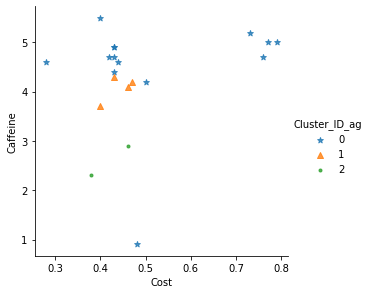

In [349]:
#5) Plotting the Clusters before Normalization (Scale Down) :

markers = ['*','^','.']
sns.lmplot("Cost","Caffeine", data = bev_df, hue = "Cluster_ID_ag", markers = markers, fit_reg = False, size =4)

6) To implement Normalization on the input Beverage dataset- Bev_nm.csv using Scaler transformation inorder to prevent

the domination of the particular attribute/feature 'Potassium' which has a higher range / domain of values ,

as compared to the other attribute/feature of the input dataset to dominate the Clutering Process :


In [350]:
#6) Scaling down all the Features of the input Beverage dataset- Bev_nm.csv:
 
from sklearn.preprocessing import StandardScaler
sclr1 = StandardScaler()

scaled_bev_df1 = sclr1.fit_transform(beverages_df1[["Potassium", "Sodium", "Caffeine", "Cost"]])

In [351]:
#To view the input Beverage dataset- Bev_nm.csv after 
#Scaling down the values of all the numerical valued 
#Features("Potassium", "Sodium", "Caffeine", "Cost") of the dataset:

scaled_bev_df1[5:10]    

array([[ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861]])

In [352]:
#7) To Implement Agglomerative Clustering Technique again to 
#perform Clustering on the Normalized version of the input 
#Beverage dataset- Bev_nm.csv after Scaling down the values
#of all the numerical valued Features of the dataset:

ag_clusters_scaled = AgglomerativeClustering(3)

ag_clusters_scaled.fit(scaled_bev_df1)

AgglomerativeClustering(n_clusters=3)

To view the Original data of the input Beverage dataset with the New Assigned Cluster ID s after implementing Agglomerative Clustering on the Normalized version of the input dataset i.e, the Scaled down values of all the numerical valued Features of the input dataset version of the - Bev_nm.csv:

In [353]:
#The Output variable that contains the Cluster - ID s for 
#each of the data items in the Normalized version 
#(Scaled down values of all the numerical valued Features) of the input dataset is 
#ag_clusters_scaled.labels_

bev_df["Cluster_ID_ag_New"] = ag_clusters_scaled.labels_

In [354]:
scaled_bev_df1

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

To visualize the Clusters identified / determined by implementation of the Agglomerative Clustering Technique on the Normalized version of the input Beverage dataset- Bev_nm.csv after Scaling down the values of all the numerical valued Features of the
input Beverage dataset - Bev_nm.csv :

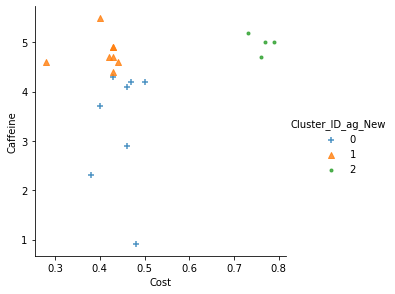

In [355]:
#8) Plotting the Clusters after Normalization (Scale Down) :

markers = ['+','^','.']
sns.lmplot("Cost","Caffeine", data = bev_df, hue = "Cluster_ID_ag_New", markers = markers, fit_reg = False, size =4)

# Compairing and Analysing the Performance Measure in terms of the efficiency of Clustering for the two Clustering techniques : A) K-Means Clustering and B) Agglomerative Clustering , on a Beverage Dataset - 'Bev_nm.csv' :

It can be observed from the Cluster analysis of both k-Means and Agglomerative Clustering  that :-

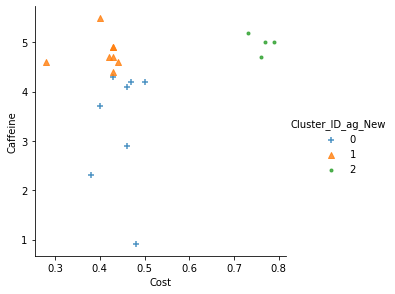

In [356]:
markers = ['+','^','.']
sns.lmplot("Cost","Caffeine", data = bev_df, hue = "Cluster_ID_ag_New", markers = markers, fit_reg = False, size =4)

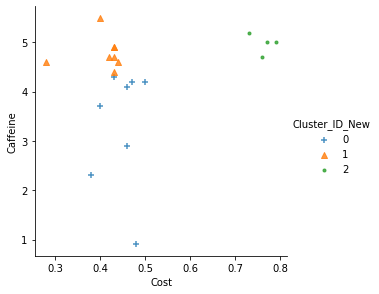

In [357]:
#8) Plotting the Clusters after Normalization (Scale Down) :

markers = ['+','^','.']
sns.lmplot("Cost","Caffeine", data = beverages_df, hue = "Cluster_ID_New", markers = markers, fit_reg = False, size =4)

that both the Clustering techniques : A) K-Means Clustering and B) Agglomerative Clustering have more or less the similar , kind of eqaul Clustering Performance Efficiency in terms of Clustering the Beverage Dataset - 'Bev_nm.csv' 